# Charting Climate Data with Ladybug & Pandas 

### Imports

In [43]:
from ladybug.epw import EPW
import honeybee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plots charts inline
%matplotlib inline 

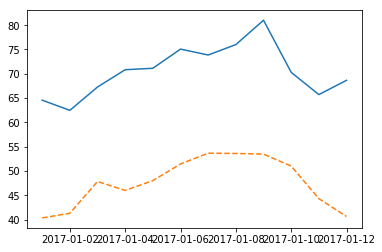

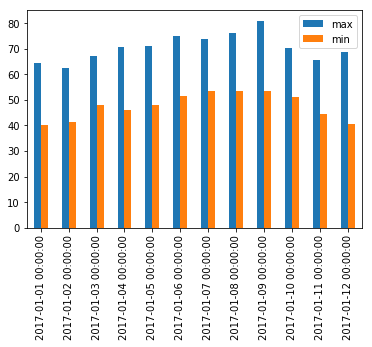

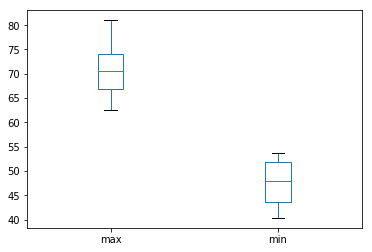

In [40]:
epw_data = EPW('data/USA_CA_San.Luis.Obispo.AP.722897_TMY3.epw')
dry_bulb = epw_data.dry_bulb_temperature
horiz_radiation = epw_data.horizontal_infrared_radiation_intensity
dew_point = epw_data.dew_point_temperature
rainfall = epw_data.liquid_precipitation_depth


dict = {'dt':[], 'dry_bulb':[], 'horiz_radiation':[], 'dew_point':[], 'rainfall':[]}

for i, j, k, l in zip(dry_bulb, horiz_radiation, dew_point, rainfall):
    dict['dt'].append(i.datetime)
    dict['dry_bulb'].append(i.value * 9 / 5 + 32)
    dict['horiz_radiation'].append(j.value)
    dict['dew_point'].append(k.value * 9 / 5 + 32)
    dict['rainfall'].append(l.value)

df = pd.DataFrame.from_dict(dict)
ts = pd.Series(df['dry_bulb'].values, index=df['dt'])
#ts_mean = ts.resample('D').mean().resample('M').mean()
ts_mean = ts.resample('M').mean()
ts_min = ts.resample('D').min().resample('M').mean()
ts_max = ts.resample('D').max().resample('M').mean()
df_temps = pd.DataFrame([ts_max, ts_min])
#df_temps.plot.bar();

df1 = pd.DataFrame({"max":ts_max.values, "min":ts_min.values}, index=pd.date_range('1/1/2017', periods=12))
plt.plot(df1["max"], linestyle='-')
plt.plot(df1["min"], linestyle='--')
df1.plot.bar()
df1.plot.box()


** Some header **